In [4]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline 
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (30,20)
matplotlib.rcParams['figure.facecolor'] = '#00000000'




In [5]:
y=mysql.connector.connect(host='localhost',user='root',password='Shubham@123',database='ipl')
ipl_deliveries_df=pd.read_sql_query("Select * from deliveries",y)
ipl_deliveries_df.sample(5)

c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,matchid,inning,batting_team,bowling_team,o_ver,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
139450,590,1,Royal Challengers Bangalore,Mumbai Indians,10,5,AB de Villiers,V Kohli,HH Pandya,0,...,0,0,0,0,1,0,1,,,
133702,564,1,Sunrisers Hyderabad,Kings XI Punjab,18,2,KL Rahul,NV Ojha,BE Hendricks,0,...,0,0,0,0,0,0,0,NV Ojha,run out,GJ Bailey
68163,288,2,Royal Challengers Bangalore,Rajasthan Royals,8,1,V Kohli,CH Gayle,SR Watson,0,...,0,0,0,0,1,0,1,,,
18932,81,1,Kings XI Punjab,Kolkata Knight Riders,13,3,IK Pathan,K Goel,Umar Gul,0,...,0,0,0,0,0,0,0,,,
38567,165,1,Delhi Daredevils,Rajasthan Royals,8,3,TM Dilshan,AB de Villiers,SK Warne,0,...,0,0,0,0,1,0,1,,,


In [6]:
bowlers_runs_extra=pd.read_sql_query("select bowler,sum(extra_runs) as 'highest extra runs' from deliveries group by bowler order by 2 desc limit 10;",y)
bowlers_runs_extra

c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,bowler,highest extra runs
0,SL Malinga,293.0
1,P Kumar,236.0
2,UT Yadav,219.0
3,DJ Bravo,201.0
4,B Kumar,197.0
5,I Sharma,194.0
6,RP Singh,181.0
7,SR Watson,171.0
8,DW Steyn,171.0
9,Harbhajan Singh,170.0


c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowler', ylabel='highest extra runs'>

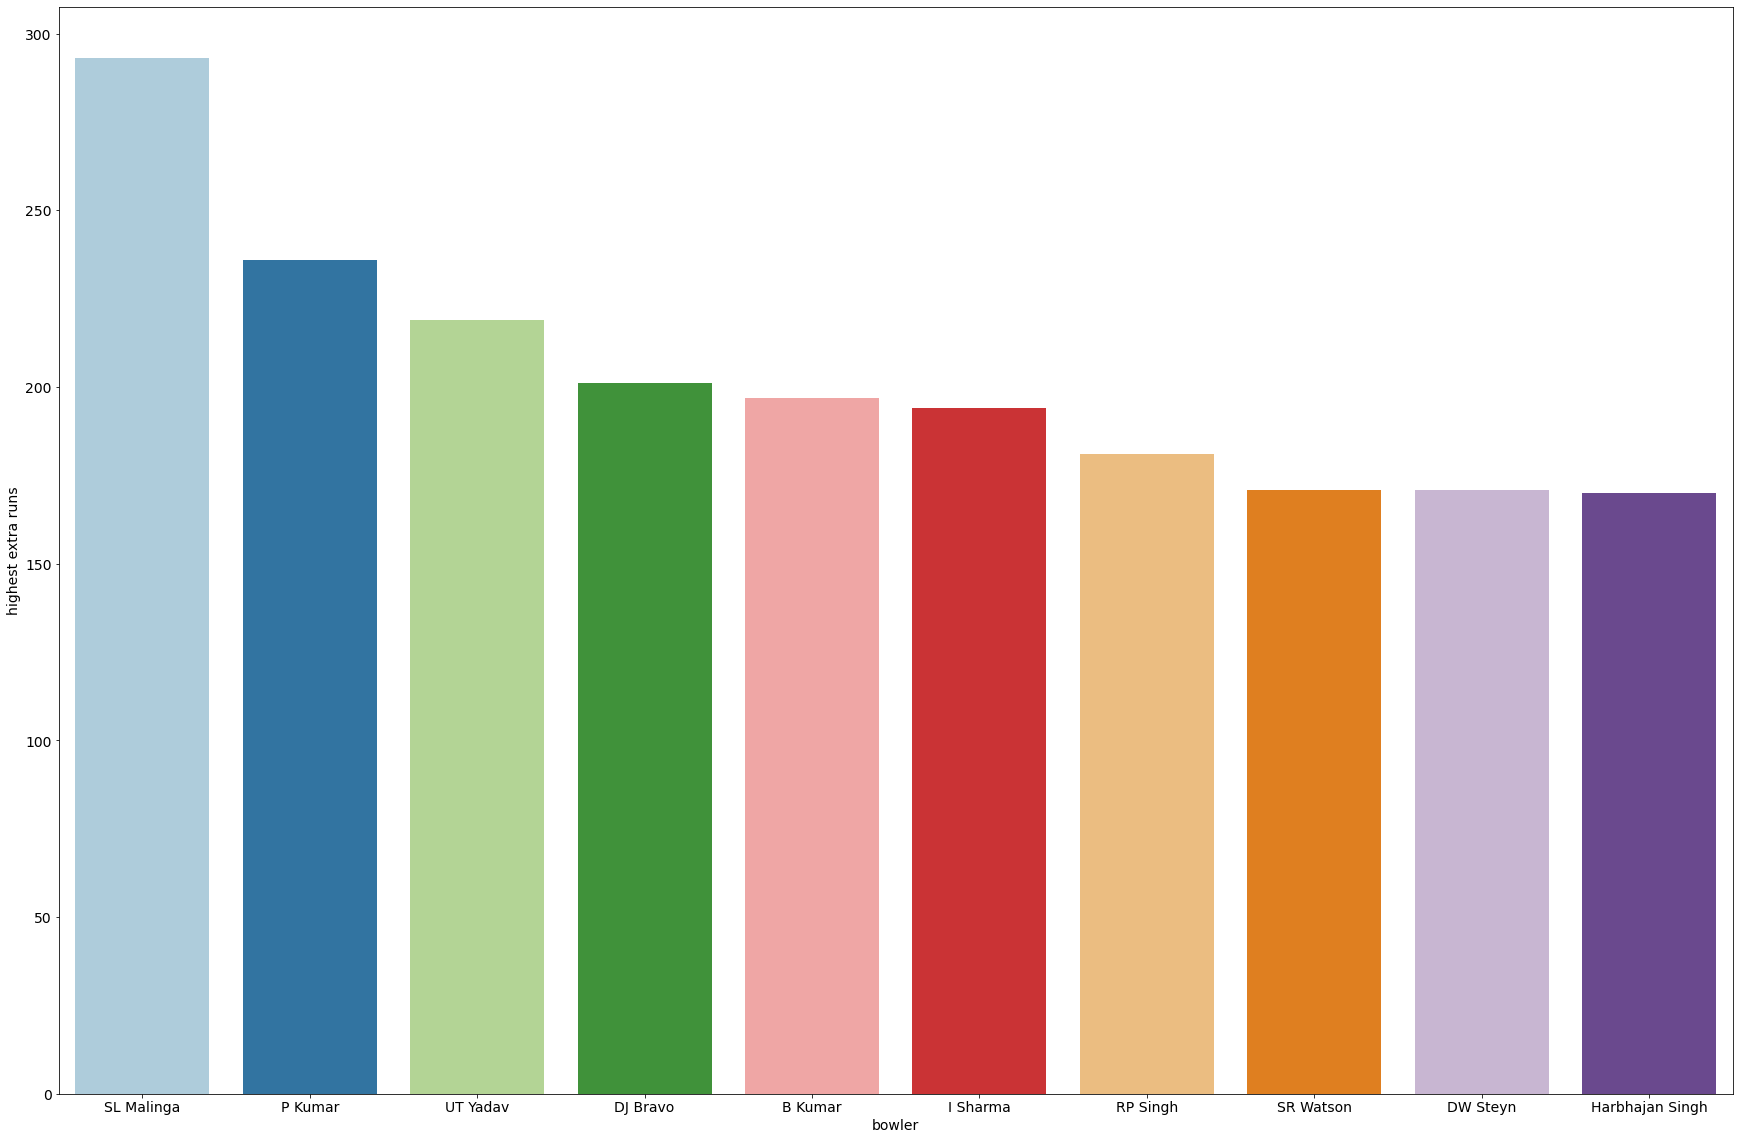

In [7]:
sns.barplot('bowler', 'highest extra runs', data=bowlers_runs_extra, palette='Paired')

In [8]:
batsman_runs=pd.read_sql_query("select batsman,sum(batsman_runs) total_run from deliveries group by batsman order by sum(batsman_runs) desc limit 10;",y)
batsman_runs

c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,batsman,total_run
0,V Kohli,5434.0
1,SK Raina,5415.0
2,RG Sharma,4914.0
3,DA Warner,4741.0
4,S Dhawan,4632.0
5,CH Gayle,4560.0
6,MS Dhoni,4477.0
7,RV Uthappa,4446.0
8,AB de Villiers,4428.0
9,G Gambhir,4223.0


c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batsman', ylabel='total_run'>

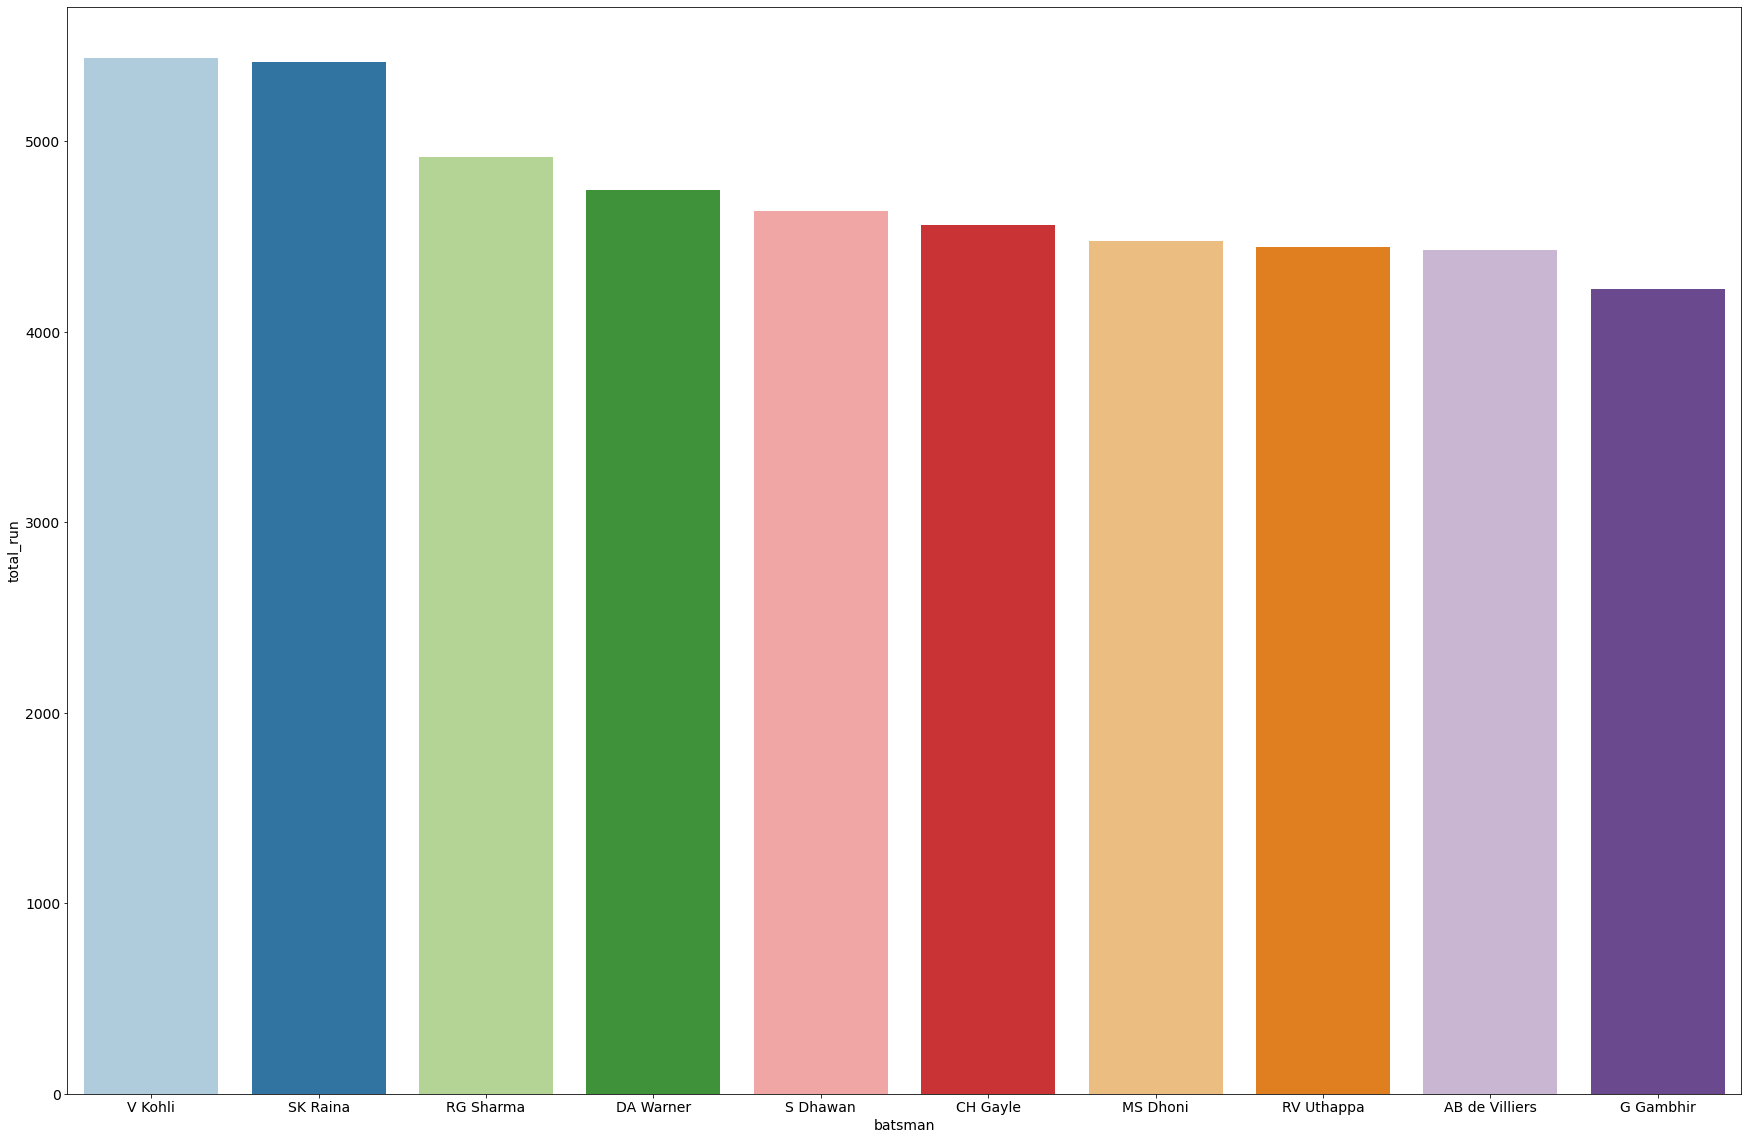

In [9]:
sns.barplot('batsman', 'total_run', data=batsman_runs, palette='Paired')

### observations
-  virat kohli is the most successful batsman of ipl and scored maximum runs followed by SK Raina,RG Sharma

In [10]:
t=pd.read_sql_query('''select dismissal_kind,player_dismissed, count(*) from deliveries where player_dismissed <>"" group by dismissal_kind,player_dismissed order by 3 desc;''',y)
t
h=t.groupby('dismissal_kind').sum()
h

c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count(*)
dismissal_kind,
bowled,1581
caught,5348
caught and bowled,211
hit wicket,10
lbw,540
obstructing the field,2
retired hurt,12
run out,852
stumped,278


c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dismissal_kind', ylabel='count(*)'>

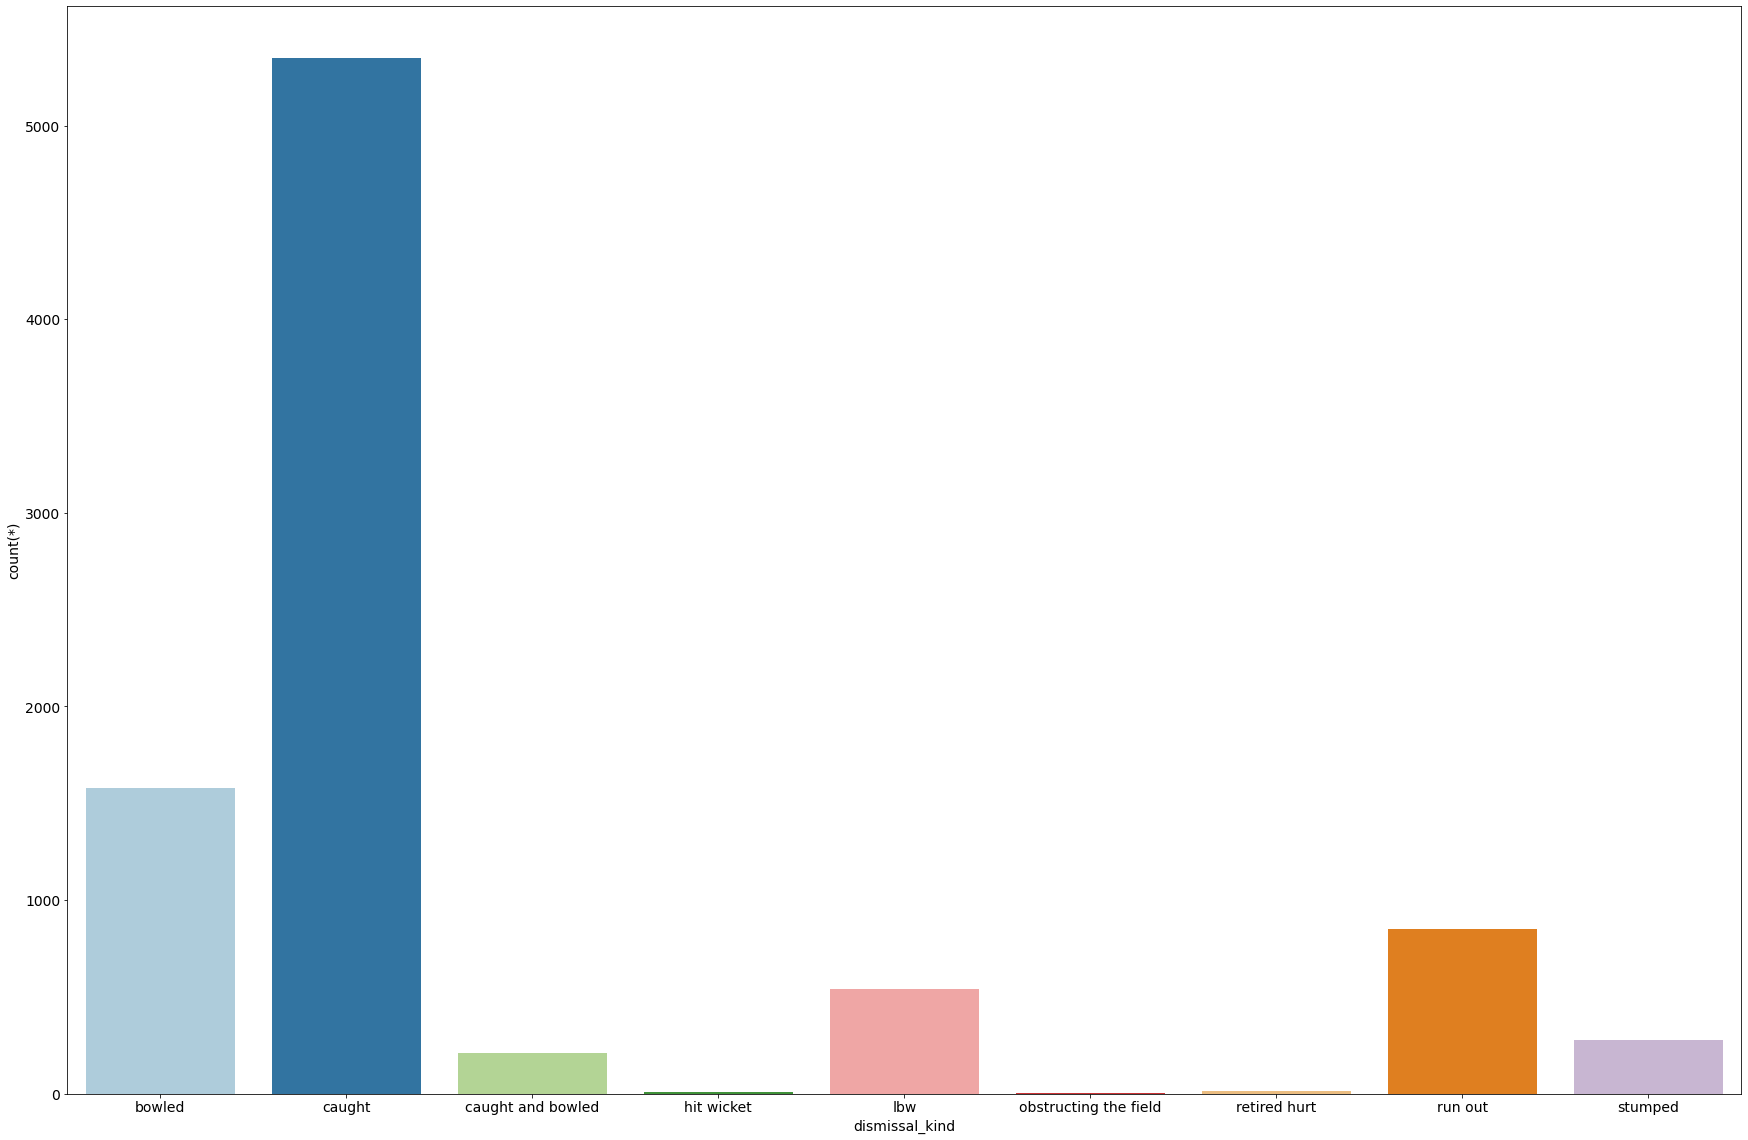

In [11]:
sns.barplot(h.index, 'count(*)', data=h, palette='Paired')


In [12]:
ipl_matches_df=pd.read_sql_query("select*from matches",y)
ipl_matches_df.sample(5)


c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,season,city,d_ate,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
626,627,2016,Kanpur,2016-05-19,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,Green Park,AK Chaudhary,CK Nandan
561,562,2015,Mumbai,2015-05-10,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,39,0,AB de Villiers,Wankhede Stadium,JD Cloete,C Shamshuddin
402,403,2013,Jaipur,2013-04-17,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,87,0,AM Rahane,Sawai Mansingh Stadium,Aleem Dar,C Shamshuddin
206,207,2010,Mumbai,2010-04-03,Mumbai Indians,Deccan Chargers,Mumbai Indians,bat,normal,0,Mumbai Indians,63,0,AT Rayudu,Brabourne Stadium,BR Doctrove,S Ravi
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi


In [15]:
from pandas_profiling import ProfileReport
l=ProfileReport(ipl_matches_df)
l.to_file(output_file='fast.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]


In [ ]:
ipl_matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## Observations:
- The following inferences can be made from the describe() method:
- The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
- The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
- 75% of the victorious teams that bat first won by a margin of 19 runs.
- 75% of the victorious teams that bat second won by a margin of 6 wickets.
- There were 756 IPL matches hosted from 2008 to 2019.

In [ ]:
ipl_matches_df.isnull().sum()

id                 0
season             0
city               0
d_ate              0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [ ]:
teams_per_season = ipl_matches_df.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
                                        1
Name: winner, Length: 103, dtype: int64

In [ ]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\1944912958.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  win_per_season_df = win_per_season_df.append(win_series)
C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\1944912958.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  win_per_season_df = win_per_season_df.append(win_series)
C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\1944912958.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  win_per_season_df = win_per_season_df.append(win_series)
C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\1944912958.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [ ]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


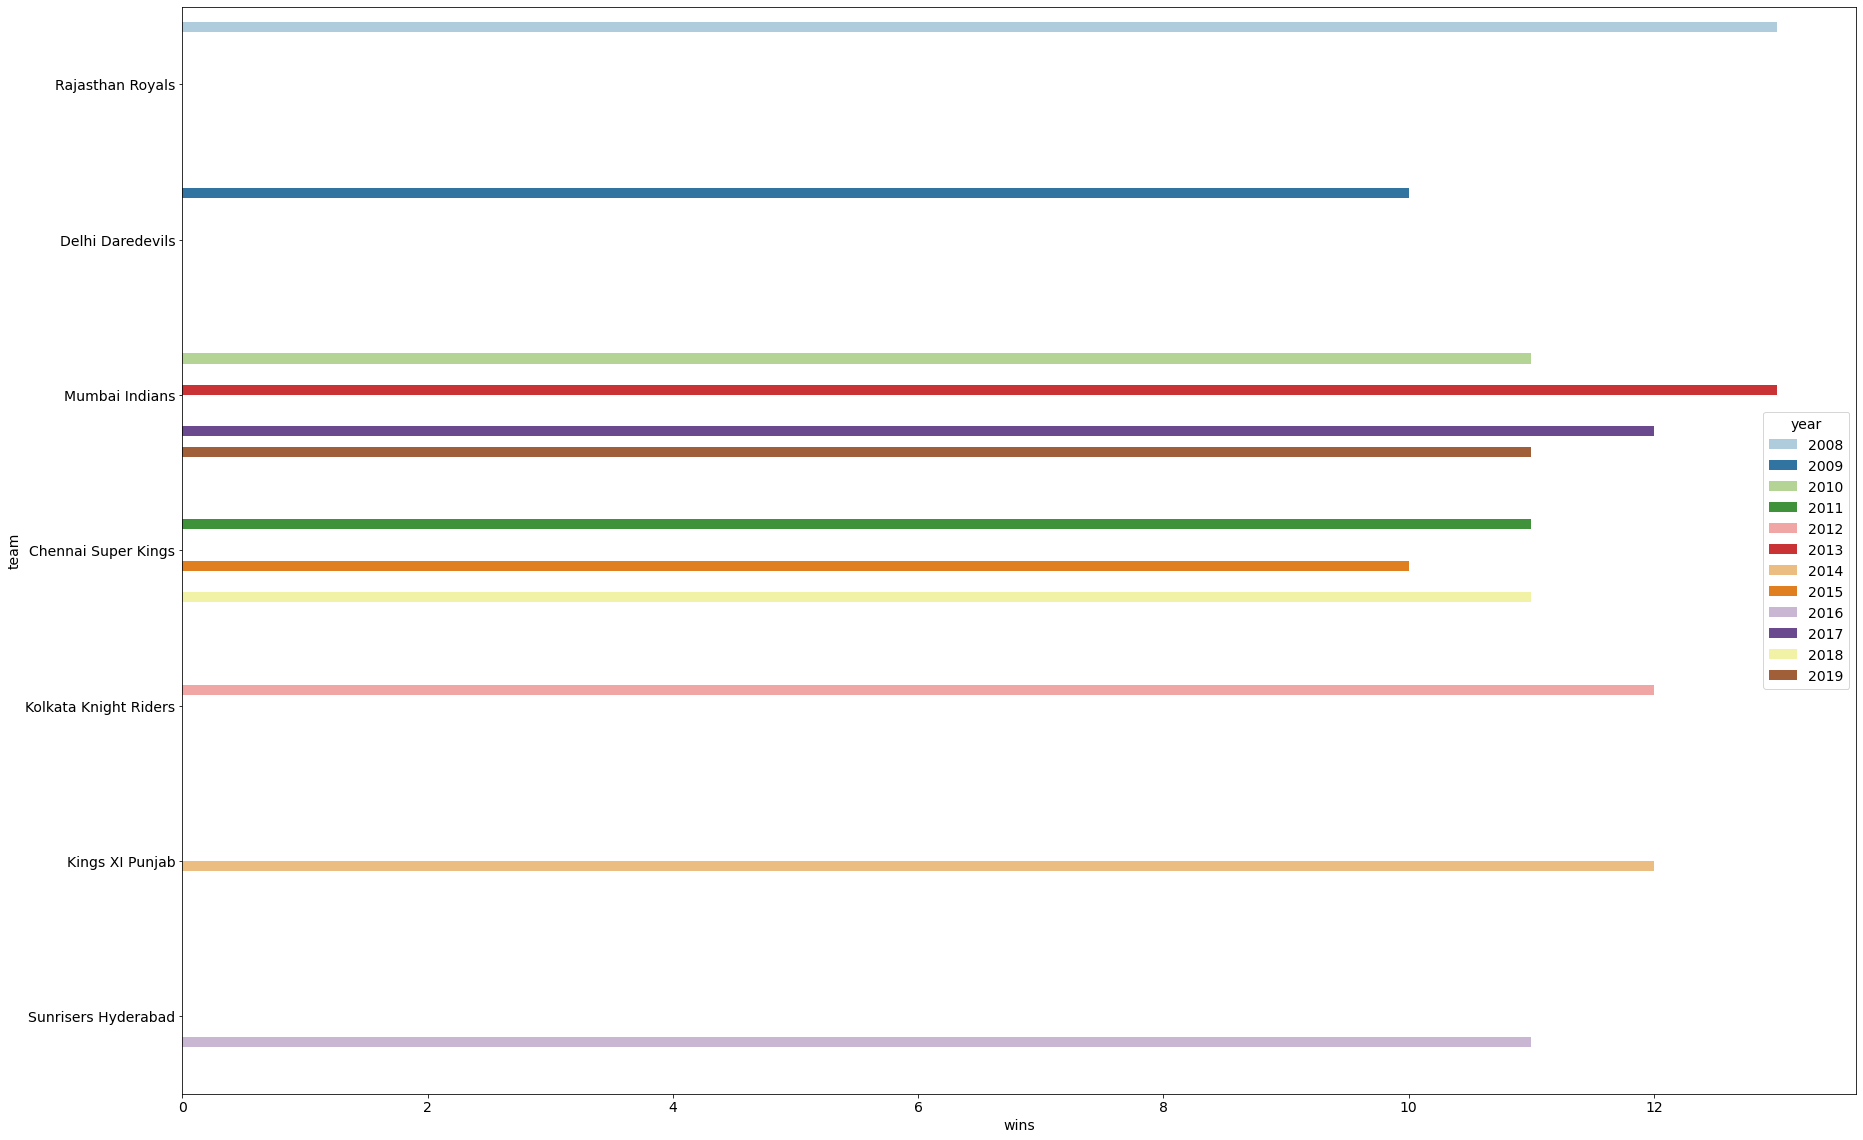

In [ ]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');

In [ ]:
venue_ser = ipl_matches_df['venue'].value_counts()

In [ ]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\63572973.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  venue_df = venue_df.append(temp_df, ignore_index=True)


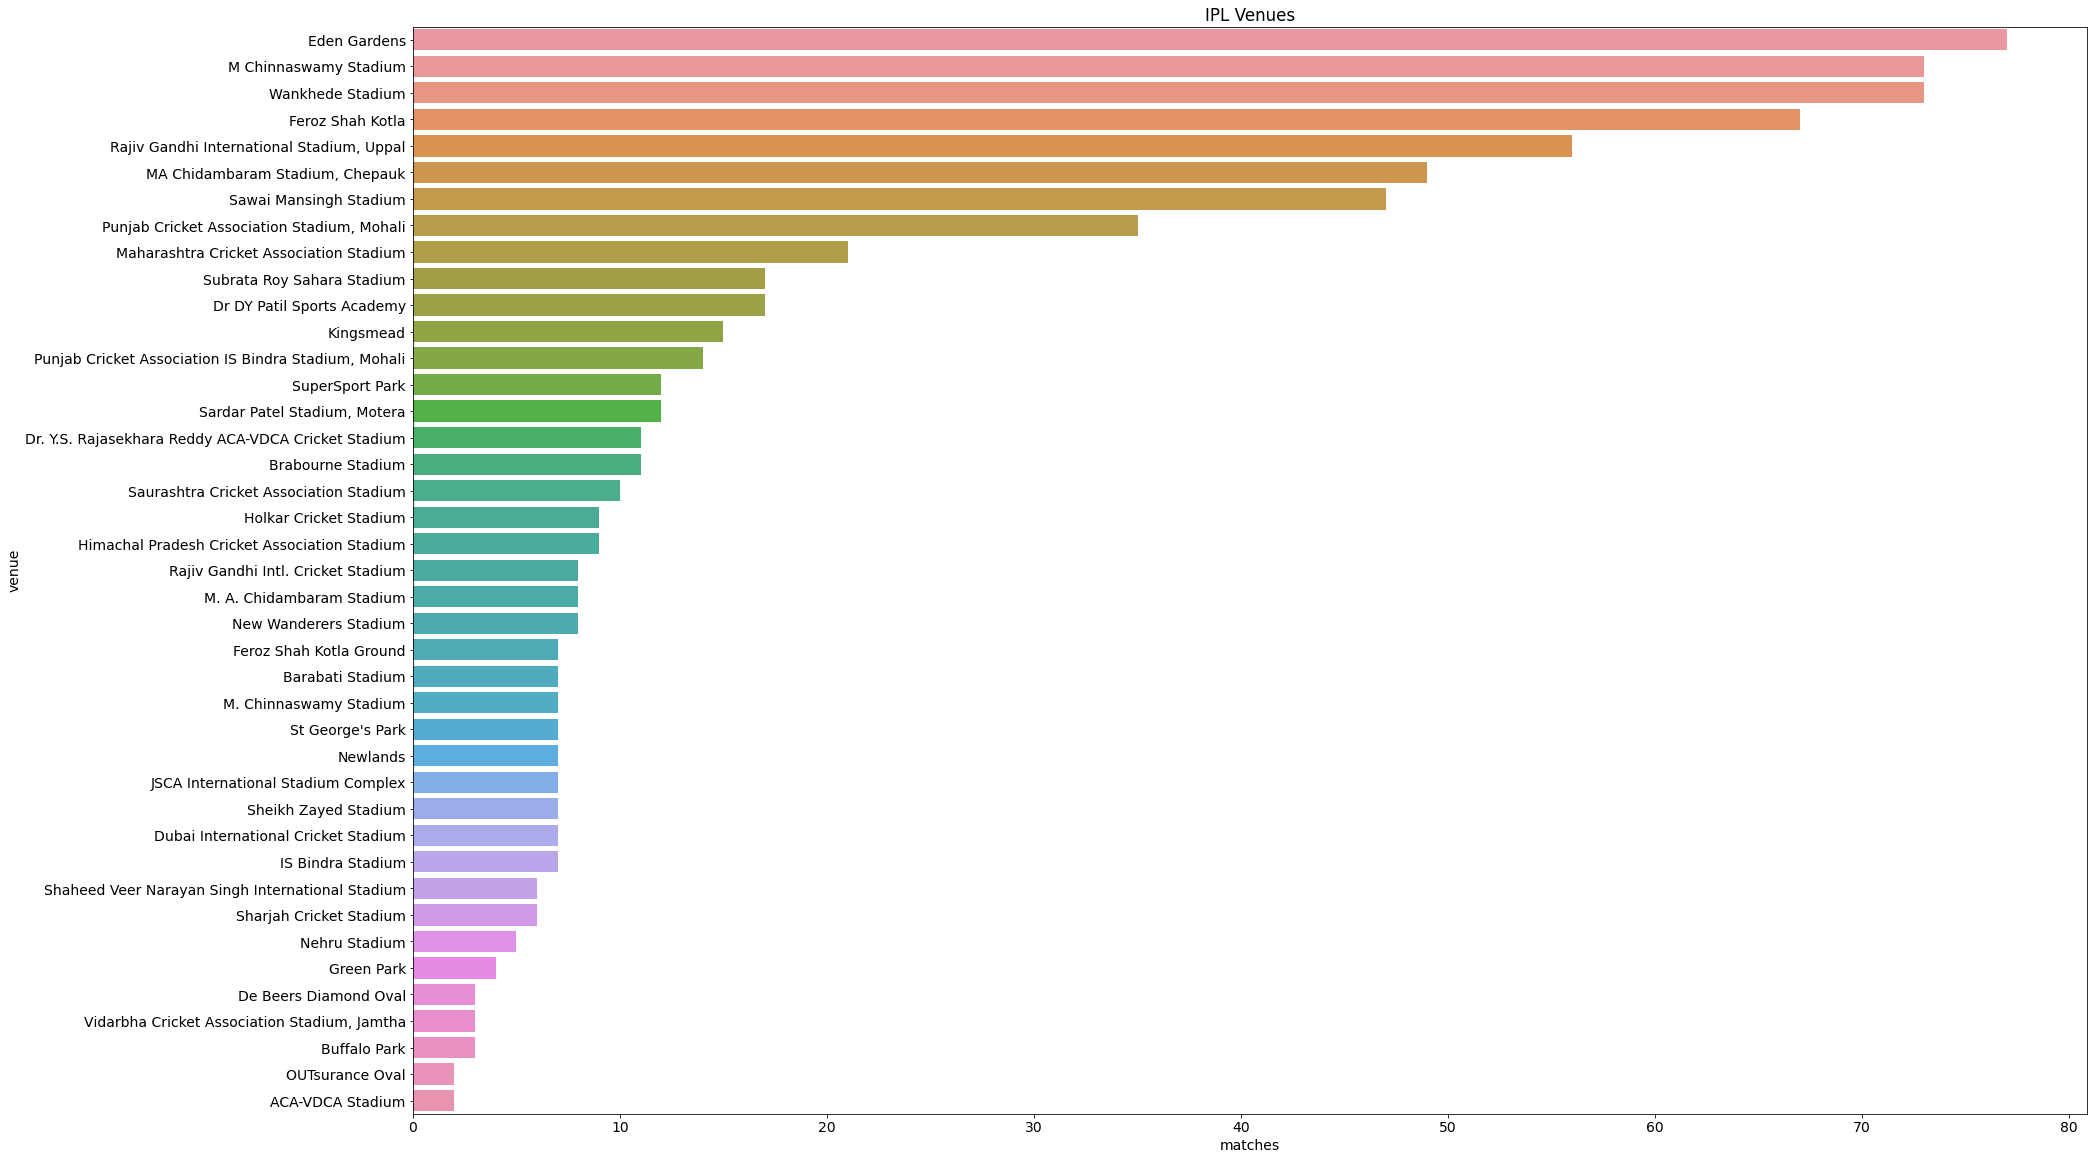

In [ ]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [ ]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


In [ ]:
team_wins_ser = ipl_matches_df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\2303023108.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)


In [ ]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


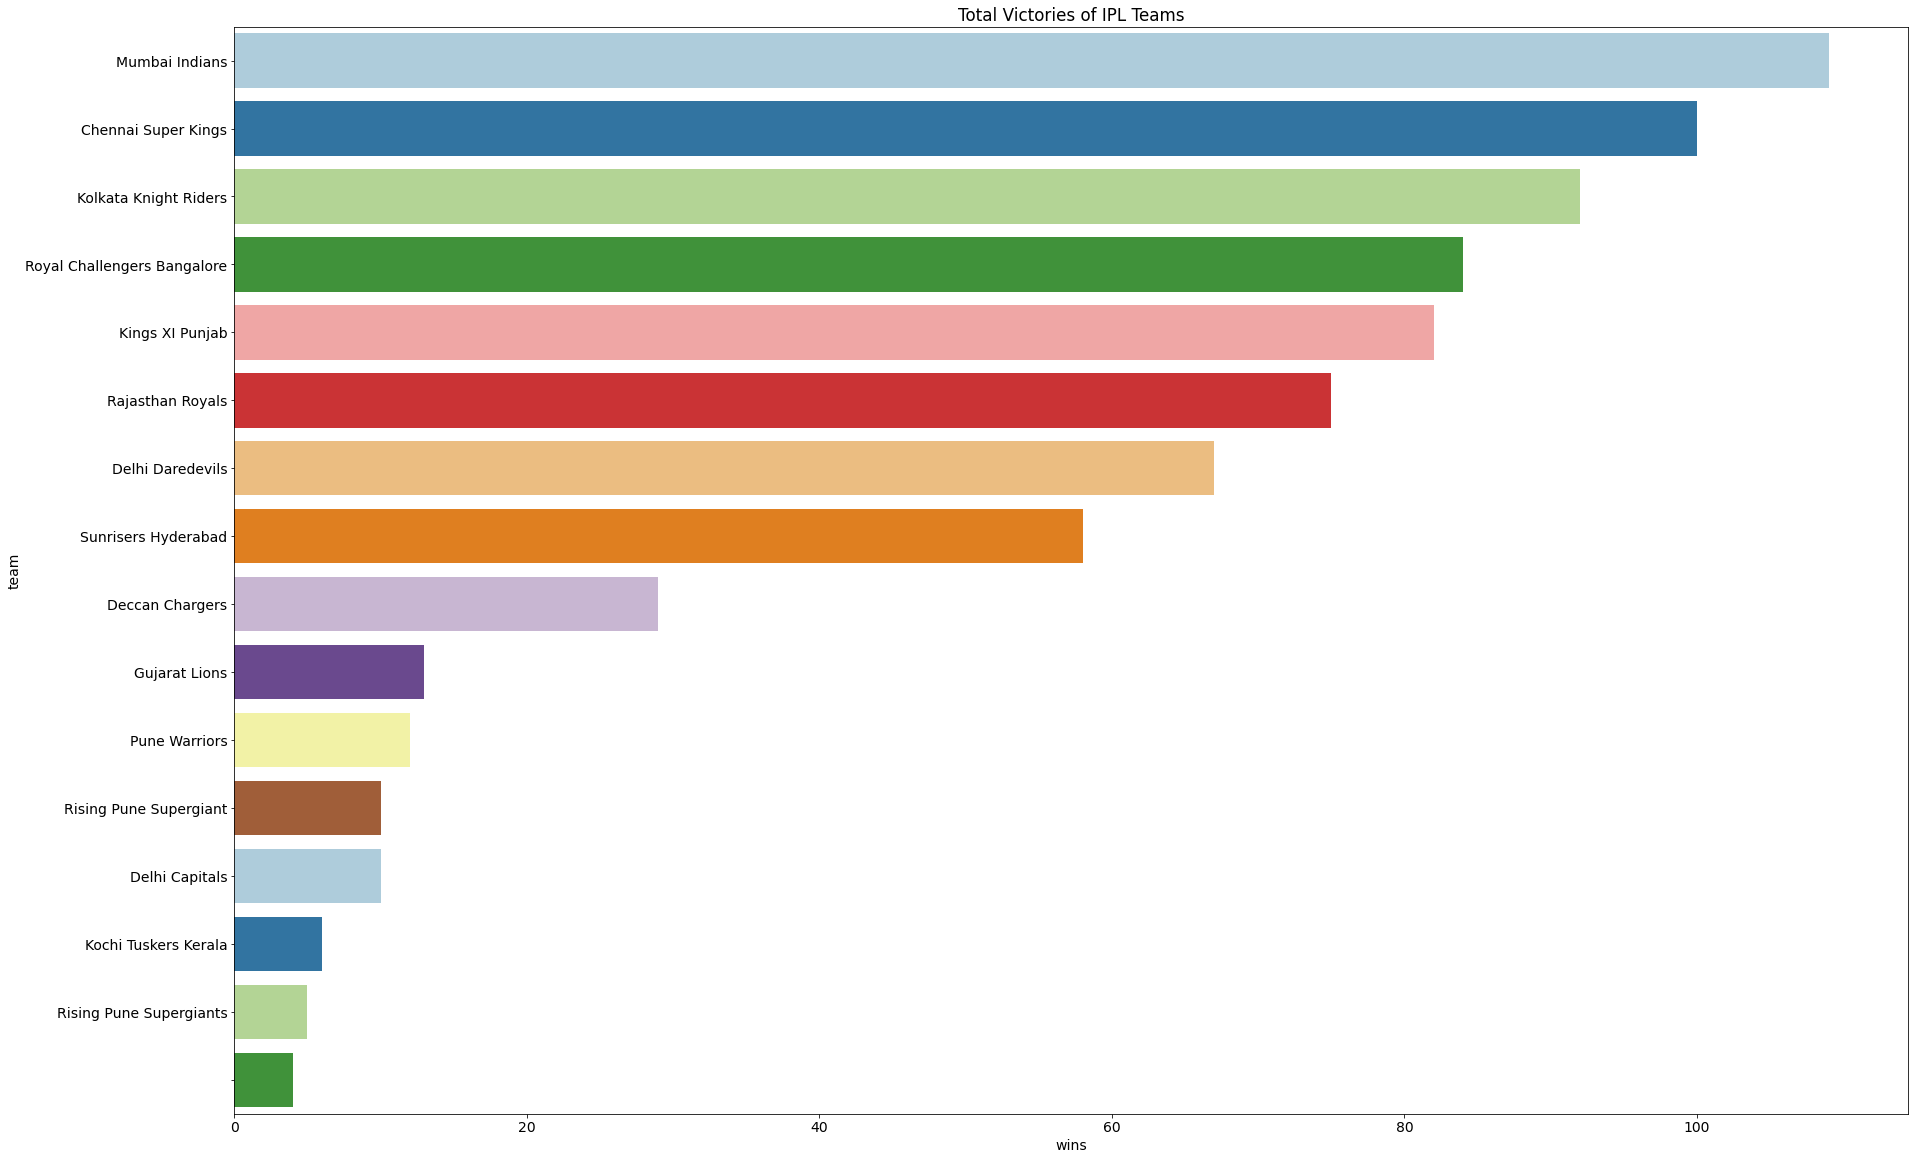

In [ ]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

# Observations:
- Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109)
 followed by Chennai Super Kings and Kolkata Knight Riders.

In [ ]:
mvp_ser = ipl_matches_df['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    

C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\1758879783.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)


In [ ]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


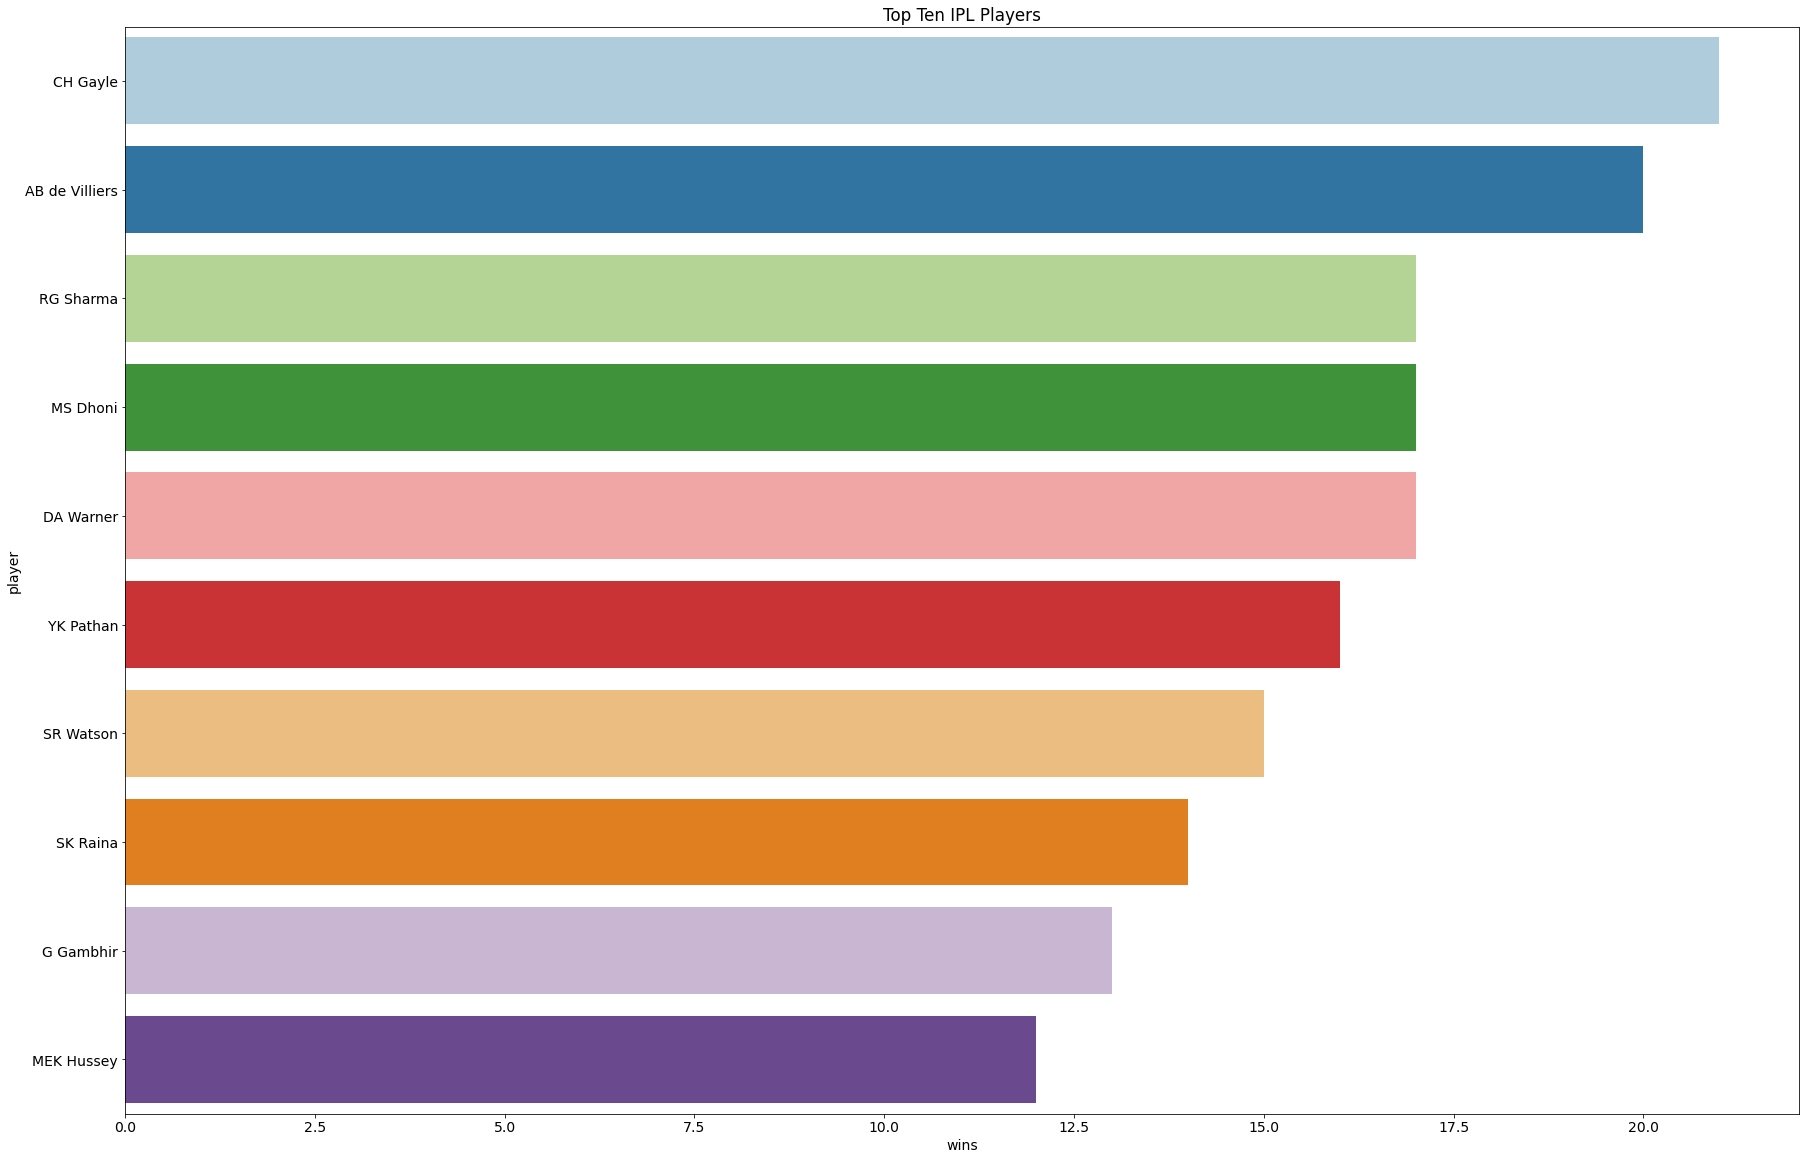

In [ ]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

# Observations:
- Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.
- Six Indian players have figured in the top ten IPL players list.

In [ ]:
toss_ser = ipl_matches_df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\3562228384.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  toss_df = toss_df.append(temp_df3, ignore_index=True)


In [ ]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


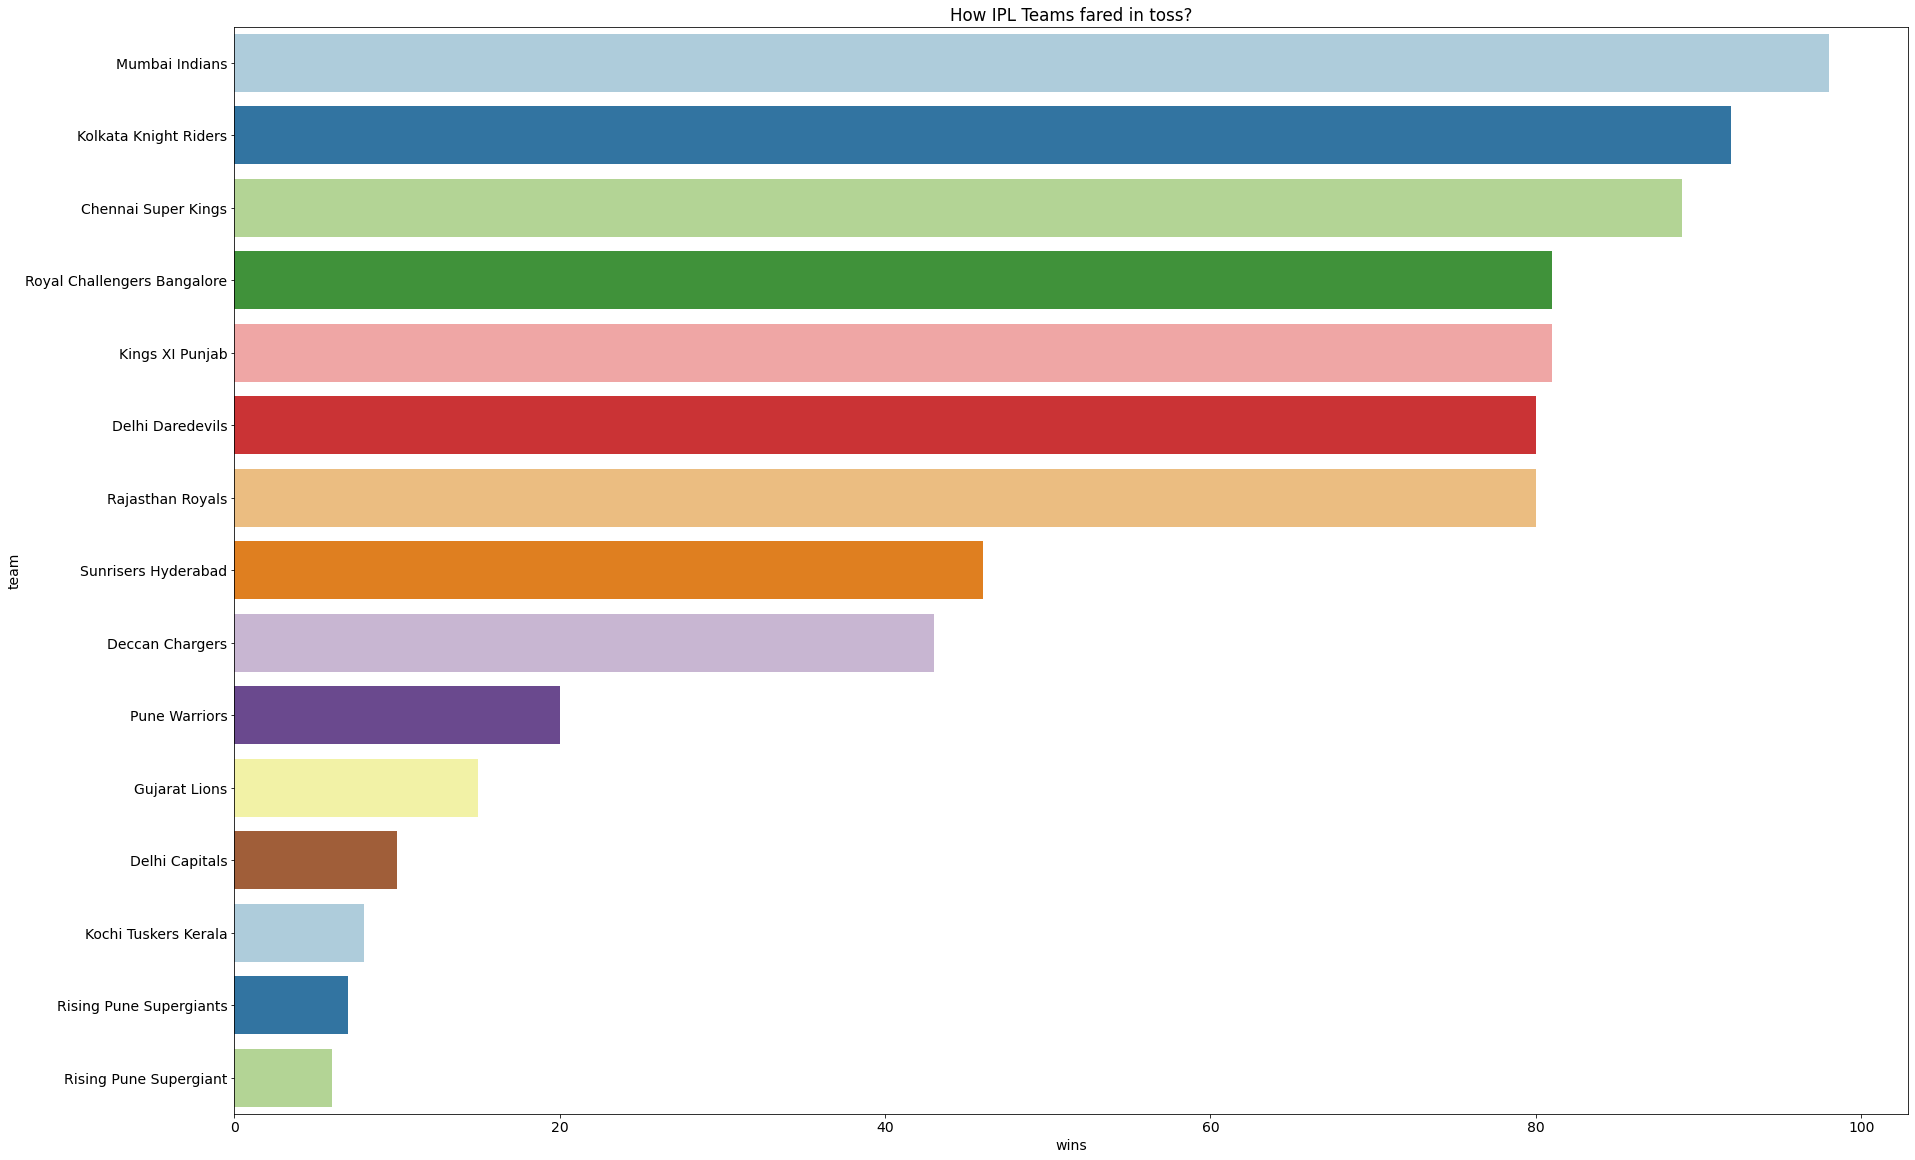

In [ ]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

# Observations:
Mumbai Indians has won the most toss(till 2019) in IPL history.
All the top teams in IPL are successful in winning the toss as well.

# Asking and Answering Questions
 - Let’s try to find answers to the questions that will linger in an IPL fan’s mind. 
 

#### Q1: Does the presence of the most valuable players in a team ensures the IPL trophy?
We have figured out the top ten players of IPL using the ‘Player of the Match’ title as the yardstick. It is interesting to note that the top two players — Chris Gayle and AB de Villers have never won an IPL. Of the top ten players, 6 players(RG Sharma, MS Dhoni, DA Warner, SR Watson, SK Raina, and G Gambhir) have won the IPL. It exemplifies the importance of the presence of the most valuable player(s) in a team.

In [ ]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


#### Q2: Which umpire has officiated the most number of IPL matches on-field?

In [ ]:
umpire1_ser = ipl_matches_df['umpire1'].value_counts()
umpire2_ser = ipl_matches_df['umpire2'].value_counts()

In [ ]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
KN Anantapadmanabhan,NaN,3.0
K Srinivasan,NaN,3.0
SD Ranade,NaN,2.0
Subroto Das,NaN,1.0


In [ ]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True) 

C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\2174578725.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  umpire_df= umpire_df.append(temp_df4, ignore_index=True)


In [ ]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
58,SJA Taufel,55.0


S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena.

### Q3: Which team is the most successful team in IPL?
Nothing succeeds like success. In a game of cricket, winning is everything. We have narrowed down on the list of teams that made the most number of wins in each season. The DataFrame win_per_season_df gives the required information. Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019). Mumbai Indians won the IPL trophy in 2013, 2015, 2017, and 2019.

In [ ]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


Mumbai Indians secured the most number of wins(109) in IPL, followed by Chennai Super Kings.

In [ ]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


Of all the IPL matches played till 2019, Mumbai Indians has emerged victorious in the most number of games. They have secured most wins in four seasons and have won four IPL trophies so far. Hence Mumbai Indians is the most successful team in IPL.

### Q4: Which city has hosted the maximum number of IPL matches?


In [ ]:
ipl_matches_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
                    7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
city_ser = ipl_matches_df['city'].value_counts()

city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_ser.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df6, ignore_index=True)

C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\2523447068.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city_df = city_df.append(temp_df6, ignore_index=True)


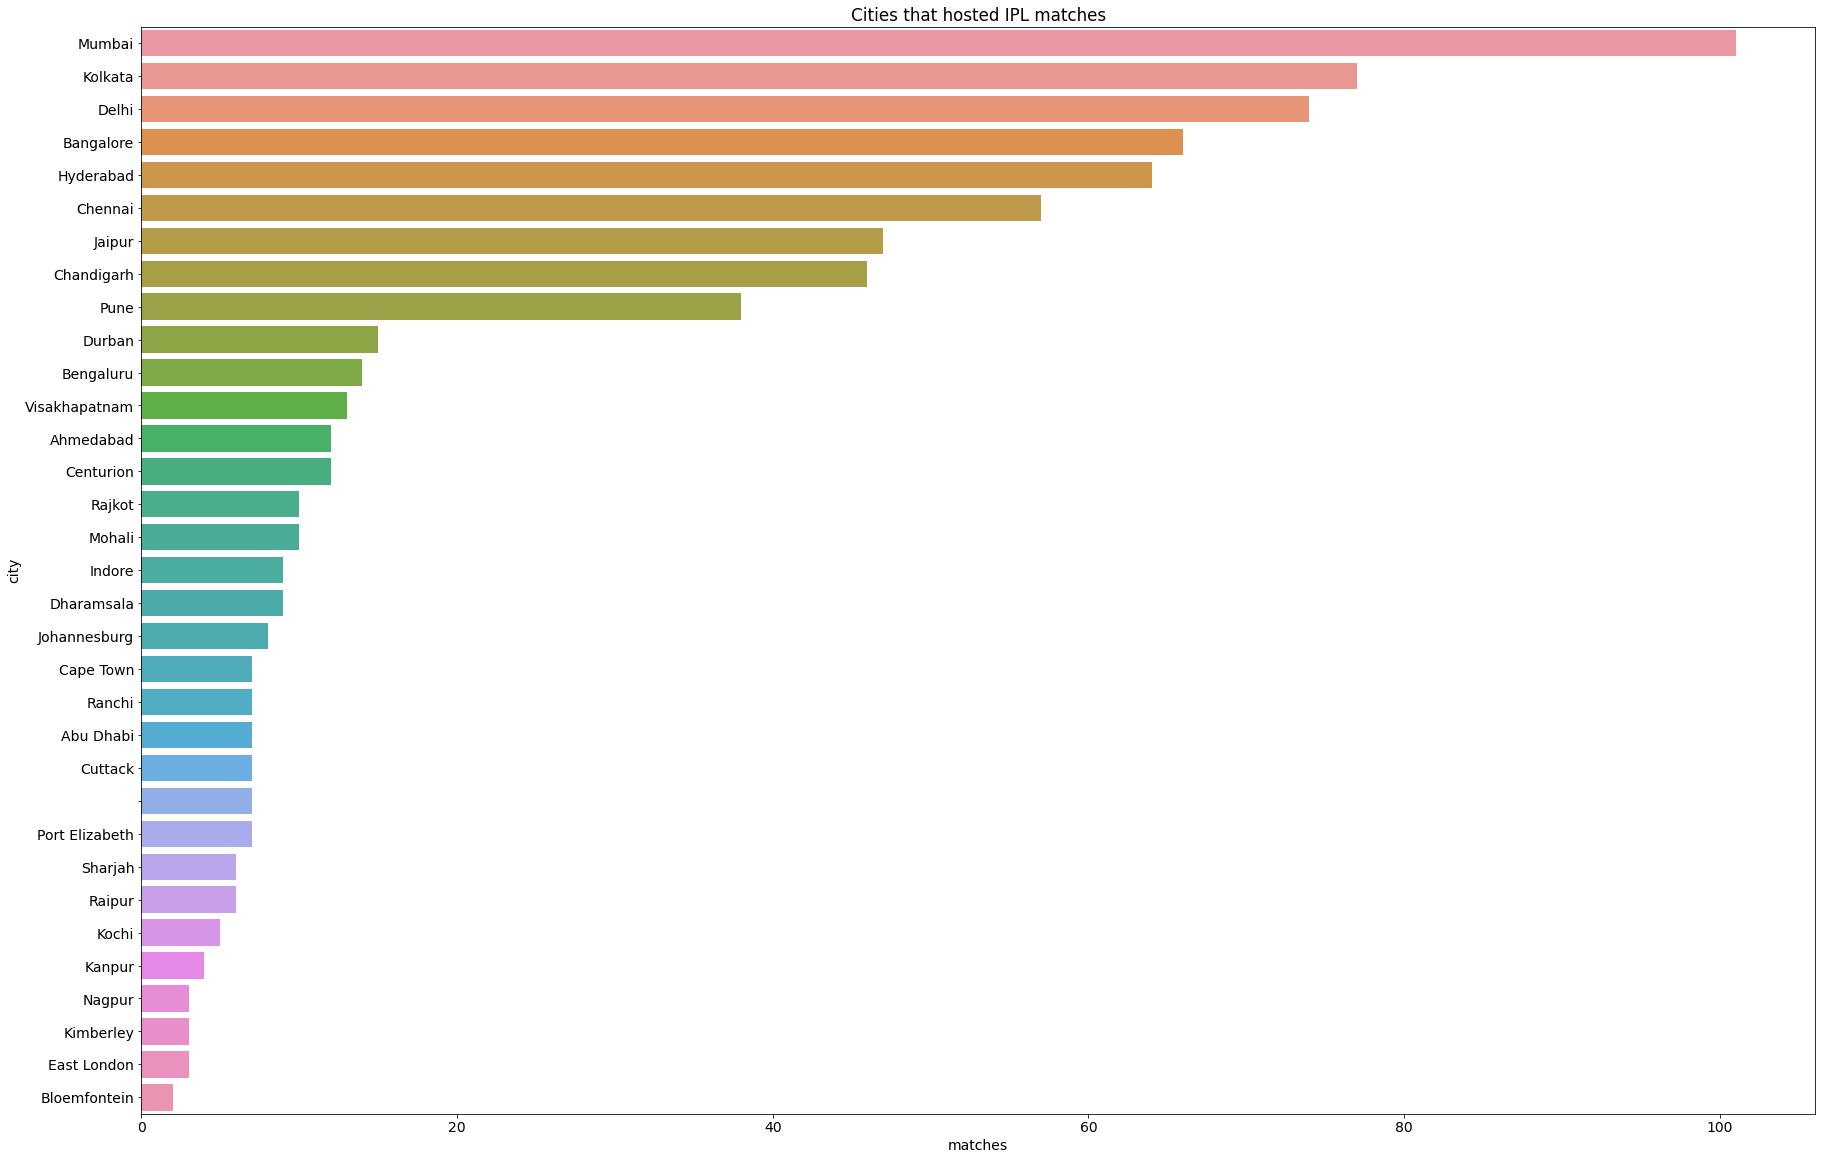

In [ ]:
plt.title("Cities that hosted IPL matches")
sns.barplot(x='matches', y='city', data=city_df);

The city of Mumbai has hosted the maximum number of IPL matches.

### Q5: Does winning the toss has any advantage?

In [ ]:
win_count = 0
for index, value in ipl_matches_df.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(ipl_matches_df)
print('The probability of winning if won the toss: {:.2f}' .format(prob))    

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

### Q6: What are the major victories in IPL? Is it better to defend or chase in IPL?

In [ ]:
len(ipl_matches_df)

756

In [ ]:
defend_vict_ser = ipl_matches_df['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

118      1
130      1
60       1
87       1
62       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

- Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.
- When defending a total, the biggest victory was by 146 runs. Let’s find out that particular match.


In [ ]:
score = 146
for index, row in ipl_matches_df.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
season                         2017
city                          Delhi
d_ate                    2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.



In [ ]:
chasing_vict_ser = ipl_matches_df['win_by_wickets'].value_counts()
chasing_vict_ser

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

- Of the 756 IPL matches played from 2008 to 2019, 350 matches were won defending the total.
- When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). There were 11 such instances and we can find the details about those matches by the following code snippet:

In [ ]:
for index, row in ipl_matches_df.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
d_ate                                          2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [ ]:
chasing_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df.drop([0]) 
chasing_vict_df2

C:\Users\Shubham Kumar\AppData\Local\Temp\ipykernel_5572\2785845474.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)


,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


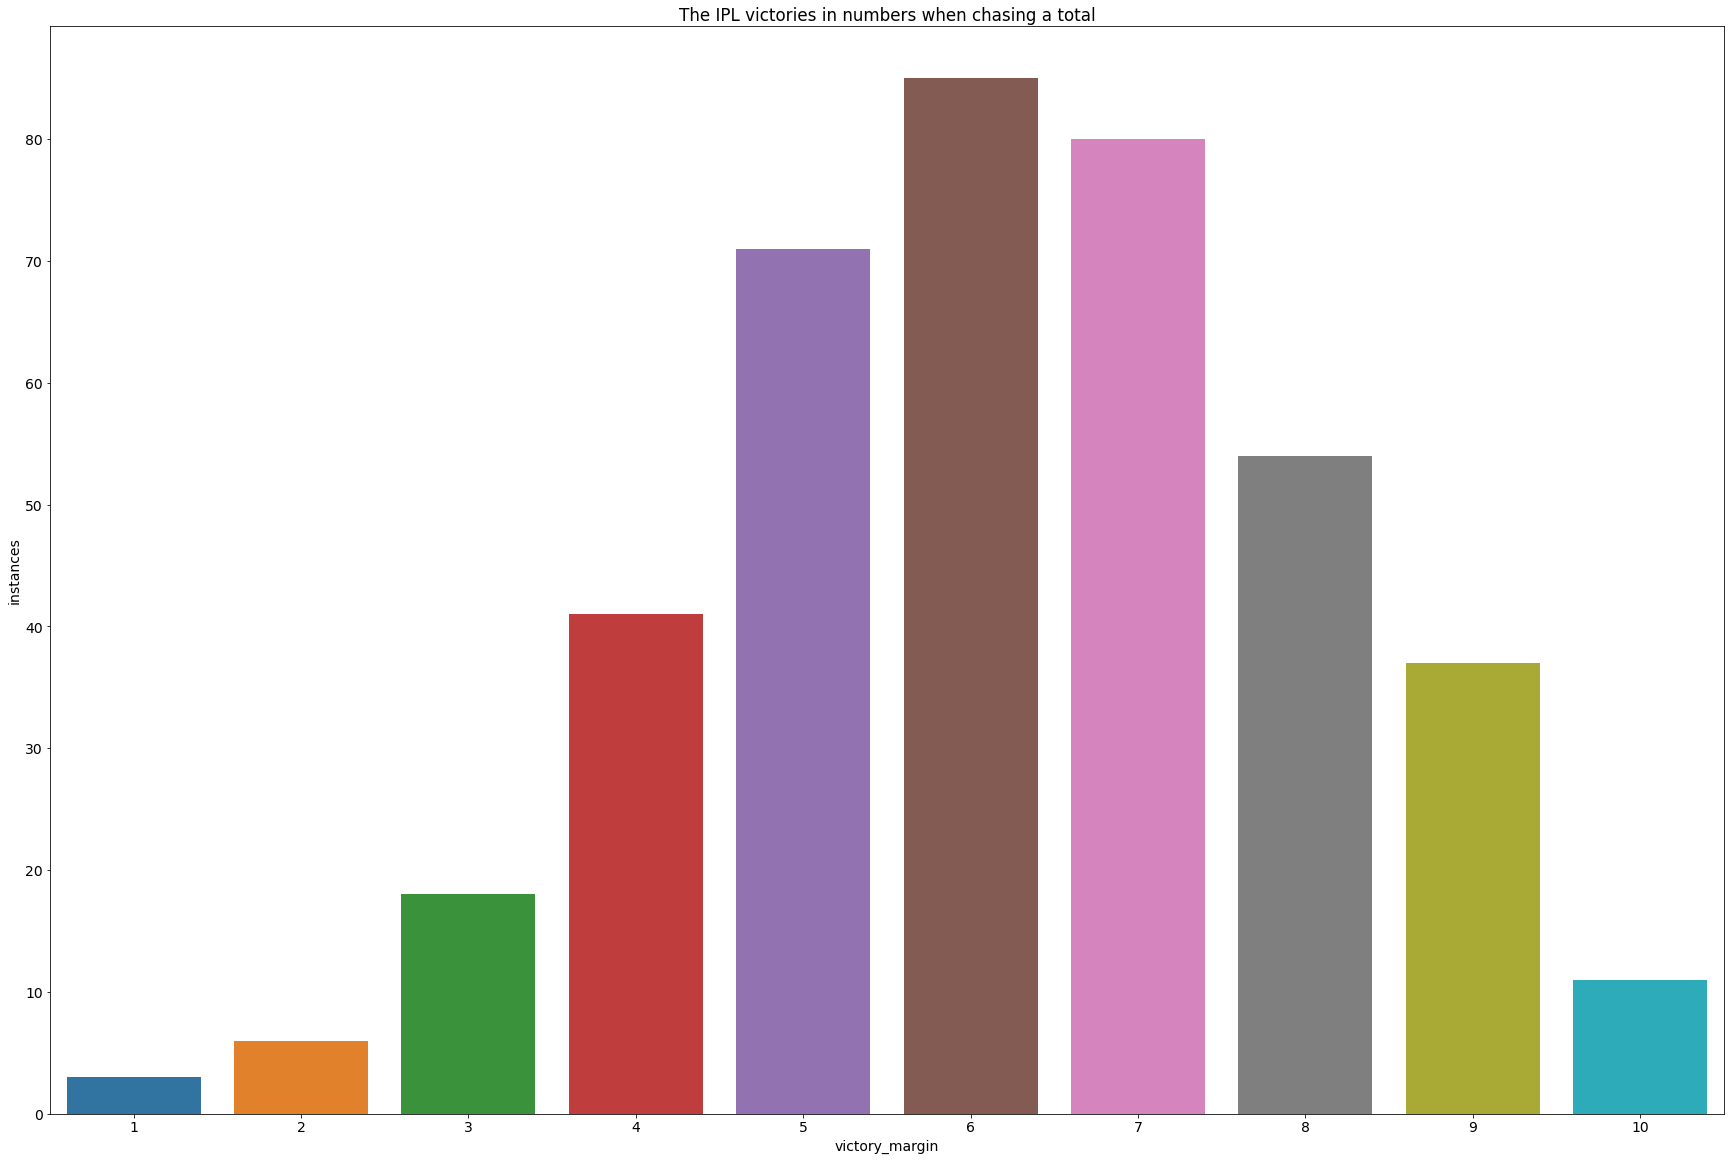

In [ ]:
plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2);

# Inferences and Conclusion
Let’s summarize the important observations we made during Exploratory Data Analysis:

- Mumbai Indians is the most successful team in IPL.
- Mumbai Indians has won the most number of toss.
- There were more matches won by chasing the total(419 matches) than defending(350 matches).
- When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 
   at Feroz Shah Kotla stadium, Delhi).
- When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.
- The Mumbai city has hosted the most number of IPL matches.
- Virat kohli is the most successful batsman of ipl and scored maximum runs followed by SK Raina,RG Sharma
- Chris Gayle has won the maximum number of player of the match title.
- Winning toss gives a slight edge(52% probability of winning) against the opponents.
- Five Indian players have figured in the top ten IPL players list.
- S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.
- Eden Gardens has hosted the maximum number of IPL matches.
- Till 2019, 40 venues have hosted 756 IPL matches.



In [ ]:
from pandas_profiling import profilereport
prof=profilereport


c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'profilereport' from 'pandas_profiling' (c:\Users\Shubham Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_profiling\__init__.py)